In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#sys.path.append('/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages')

%matplotlib inline

sys.path

['/Users/hiro./.pyenv/versions/3.6.5/lib/python36.zip',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/lib-dynload',
 '',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/linepy-3.0.8-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/PyQRCode-1.2.1-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/rsa-4.0-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/requests-2.19.1-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/akad-0.11.1-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/pyasn1-0.4.4-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/urllib3-1.23-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/lib/python3.6/site-packages/idna-2.7-py3.6.egg',
 '/Users/hiro./.pyenv/versions/3.6.5/li

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
y = train["SalePrice"]
train = train.drop("SalePrice", axis=1)

In [4]:
data = pd.concat([train, test], axis=0)

In [5]:
data.shape

(2919, 80)

In [6]:
test.shape

(1459, 80)

In [7]:
cat_df = data.iloc[:, [12, 15, 16, 30, 41, 53, 57, 58, 63]]
cat_df = cat_df.fillna("missing")
cat_df = pd.get_dummies(cat_df)
cat_df = cat_df.drop("GarageQual_TA", axis=1)

In [8]:
num_df = data.iloc[:, [1, 4, 17, 18, 19, 20, 43, 44, 46, 47, 51, 54, 56, 59, 61]]
num_df = num_df.fillna(-999)

In [9]:
cat_df.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_missing,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_missing
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
num_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars
0,60,8450,7,5,2003,2003,856,854,1710,1.0,3,8,0,2003.0,2.0
1,20,9600,6,8,1976,1976,1262,0,1262,0.0,3,6,1,1976.0,2.0
2,60,11250,7,5,2001,2002,920,866,1786,1.0,3,6,1,2001.0,2.0
3,70,9550,7,5,1915,1970,961,756,1717,1.0,3,7,1,1998.0,3.0
4,60,14260,8,5,2000,2000,1145,1053,2198,1.0,4,9,1,2000.0,3.0


In [11]:
X = pd.concat([num_df, cat_df], axis=1)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_missing,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_missing
0,60,8450,7,5,2003,2003,856,854,1710,1.0,...,0,0,0,0,0,0,0,0,0,0
1,20,9600,6,8,1976,1976,1262,0,1262,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,11250,7,5,2001,2002,920,866,1786,1.0,...,0,0,0,0,0,0,0,0,0,0
3,70,9550,7,5,1915,1970,961,756,1717,1.0,...,0,0,0,1,0,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145,1053,2198,1.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_X = X.iloc[:train.shape[0], :]
test_X = X.iloc[train.shape[0]:, :]

In [14]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [15]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )

In [16]:
lightgbm.fit(train_X, y)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_bin=200,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=4,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [22]:
sub = pd.read_csv("sample_submission.csv")
sub["SalePrice"] = lightgbm.predict(test_X)

In [23]:
sub.to_csv("simple_lgbm_sub.csv", index=False)

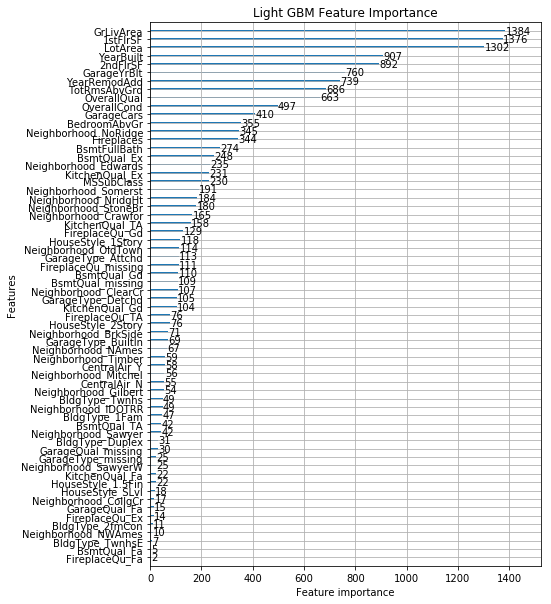

In [24]:
f, ax = plt.subplots(figsize=[7,10])
lgb.plot_importance(lightgbm, max_num_features=85, ax=ax)
plt.title("Light GBM Feature Importance")
plt.savefig('feature_import.png')

In [164]:
train.shape

(1460, 80)